In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import math
import os

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder,OneHotEncoder,PolynomialFeatures
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedKFold,LeaveOneOut,LeavePOut,train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.feature_selection import chi2,VarianceThreshold,SelectKBest,SelectFromModel,SelectPercentile,f_classif,f_regression,mutual_info_classif,mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,NearestNeighbors
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree,export_text,ExtraTreeClassifier,ExtraTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingRegressor,ExtraTreesClassifier,ExtraTreesRegressor
from sklearn.cluster import AgglomerativeClustering,Birch,SpectralClustering,DBSCAN,HDBSCAN,OPTICS,KMeans,MeanShift
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.svm import SVC,SVR,LinearSVC,LinearSVR

#pip install xgboost
#from xgboost import XGBOOSTClassifier,XGBOOSTRegressor
#pip install catboost
#from catboost import catboostClassifier,catboostRegressor
#pip install lightgm
#from lightgbm import LGBMClassifier,LGBMRegressor

In [160]:
#load dataset 1st method
bost_df=pd.read_csv('C:/Users/san/anaconda3/Lib/site-packages/sklearn/datasets/data/boston_house_prices.csv')

In [215]:

'''
#load dataset 2nd method
#load package
from sklearn.datasets import load_breast_cancer

#load dataset
breas=load_breast_cancer()

#data understanding
print(breas.keys())
print(breas.data)
print(breas.target)
print(breas.target_names)
print(breas.frame)
print(breas.feature_names)
print(breas.DESCR)

#create DataFrame and store the dataset
breas_df=pd.DataFrame(data=breas.data,columns=breas.feature_names)

breas_df['class']=breas.target
#data exploration
print(breas_df.head(2))

#set column names to understand easily
breas_df.columns=[i.replace(' ','_') for i in breas_df.columns if i.split(' ')] 

#data exploration
display(breas_df.head(2))
display(breas_df.describe().T)
display(breas_df.info())
display(breas_df.shape)
display(breas_df.dtypes)
display(type(breas_df))
display(breas_df.size)
display(len(breas_df))

#missing values detrection and imputation
display(breas_df.isnull().any())
display(breas_df.isnull().sum())

#plt.figure(figsize=(10,8))
#sns.heatmap(breas_df.isnull(),yticklabels=False,cmap='Blues')
'''

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,class
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean_texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean_perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean_area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean_smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean_compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean_concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean_concave_points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean_symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean_fractal_dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

None

(569, 31)

mean_radius                float64
mean_texture               float64
mean_perimeter             float64
mean_area                  float64
mean_smoothness            float64
mean_compactness           float64
mean_concavity             float64
mean_concave_points        float64
mean_symmetry              float64
mean_fractal_dimension     float64
radius_error               float64
texture_error              float64
perimeter_error            float64
area_error                 float64
smoothness_error           float64
compactness_error          float64
concavity_error            float64
concave_points_error       float64
symmetry_error             float64
fractal_dimension_error    float64
worst_radius               float64
worst_texture              float64
worst_perimeter            float64
worst_area                 float64
worst_smoothness           float64
worst_compactness          float64
worst_concavity            float64
worst_concave_points       float64
worst_symmetry      

pandas.core.frame.DataFrame

17639

569

mean_radius                False
mean_texture               False
mean_perimeter             False
mean_area                  False
mean_smoothness            False
mean_compactness           False
mean_concavity             False
mean_concave_points        False
mean_symmetry              False
mean_fractal_dimension     False
radius_error               False
texture_error              False
perimeter_error            False
area_error                 False
smoothness_error           False
compactness_error          False
concavity_error            False
concave_points_error       False
symmetry_error             False
fractal_dimension_error    False
worst_radius               False
worst_texture              False
worst_perimeter            False
worst_area                 False
worst_smoothness           False
worst_compactness          False
worst_concavity            False
worst_concave_points       False
worst_symmetry             False
worst_fractal_dimension    False
class     

mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
class                      0
dtype: int64

In [138]:
boston_df=bost_df.copy()

In [139]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#Data understanding
###
'''
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
'''
###

In [143]:
boston_df.tail(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [146]:
boston_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [147]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [148]:
boston_df.shape

(506, 14)

In [149]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [150]:
len(boston_df)

506

In [153]:
boston_df.size

7084

In [154]:
type(boston_df)

pandas.core.frame.DataFrame

In [157]:
#columns checked
#missing values detection and imputation
boston_df.isnull().any()
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [216]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


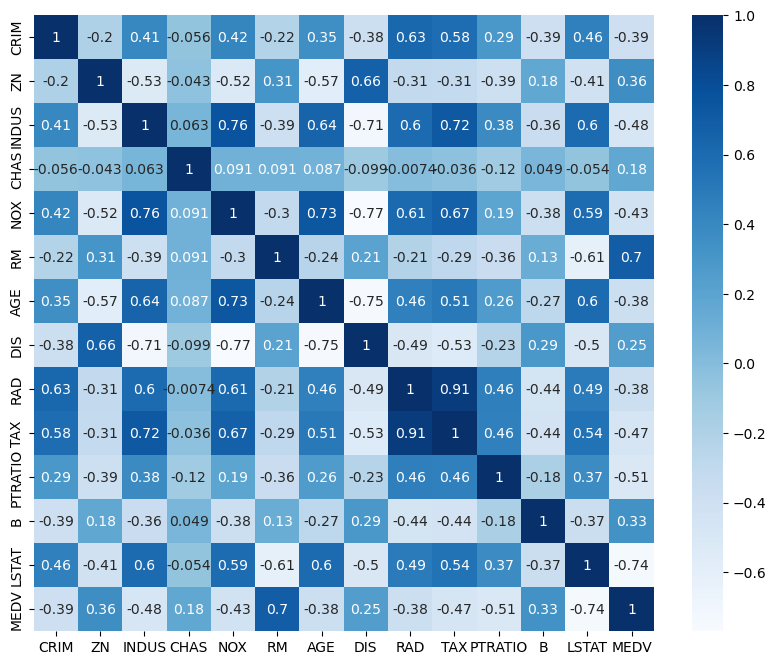

In [228]:
plt.figure(figsize=(10,8))
sns.heatmap(boston_df.corr(),annot=True,cmap="Blues",cbar=True)
plt.show()

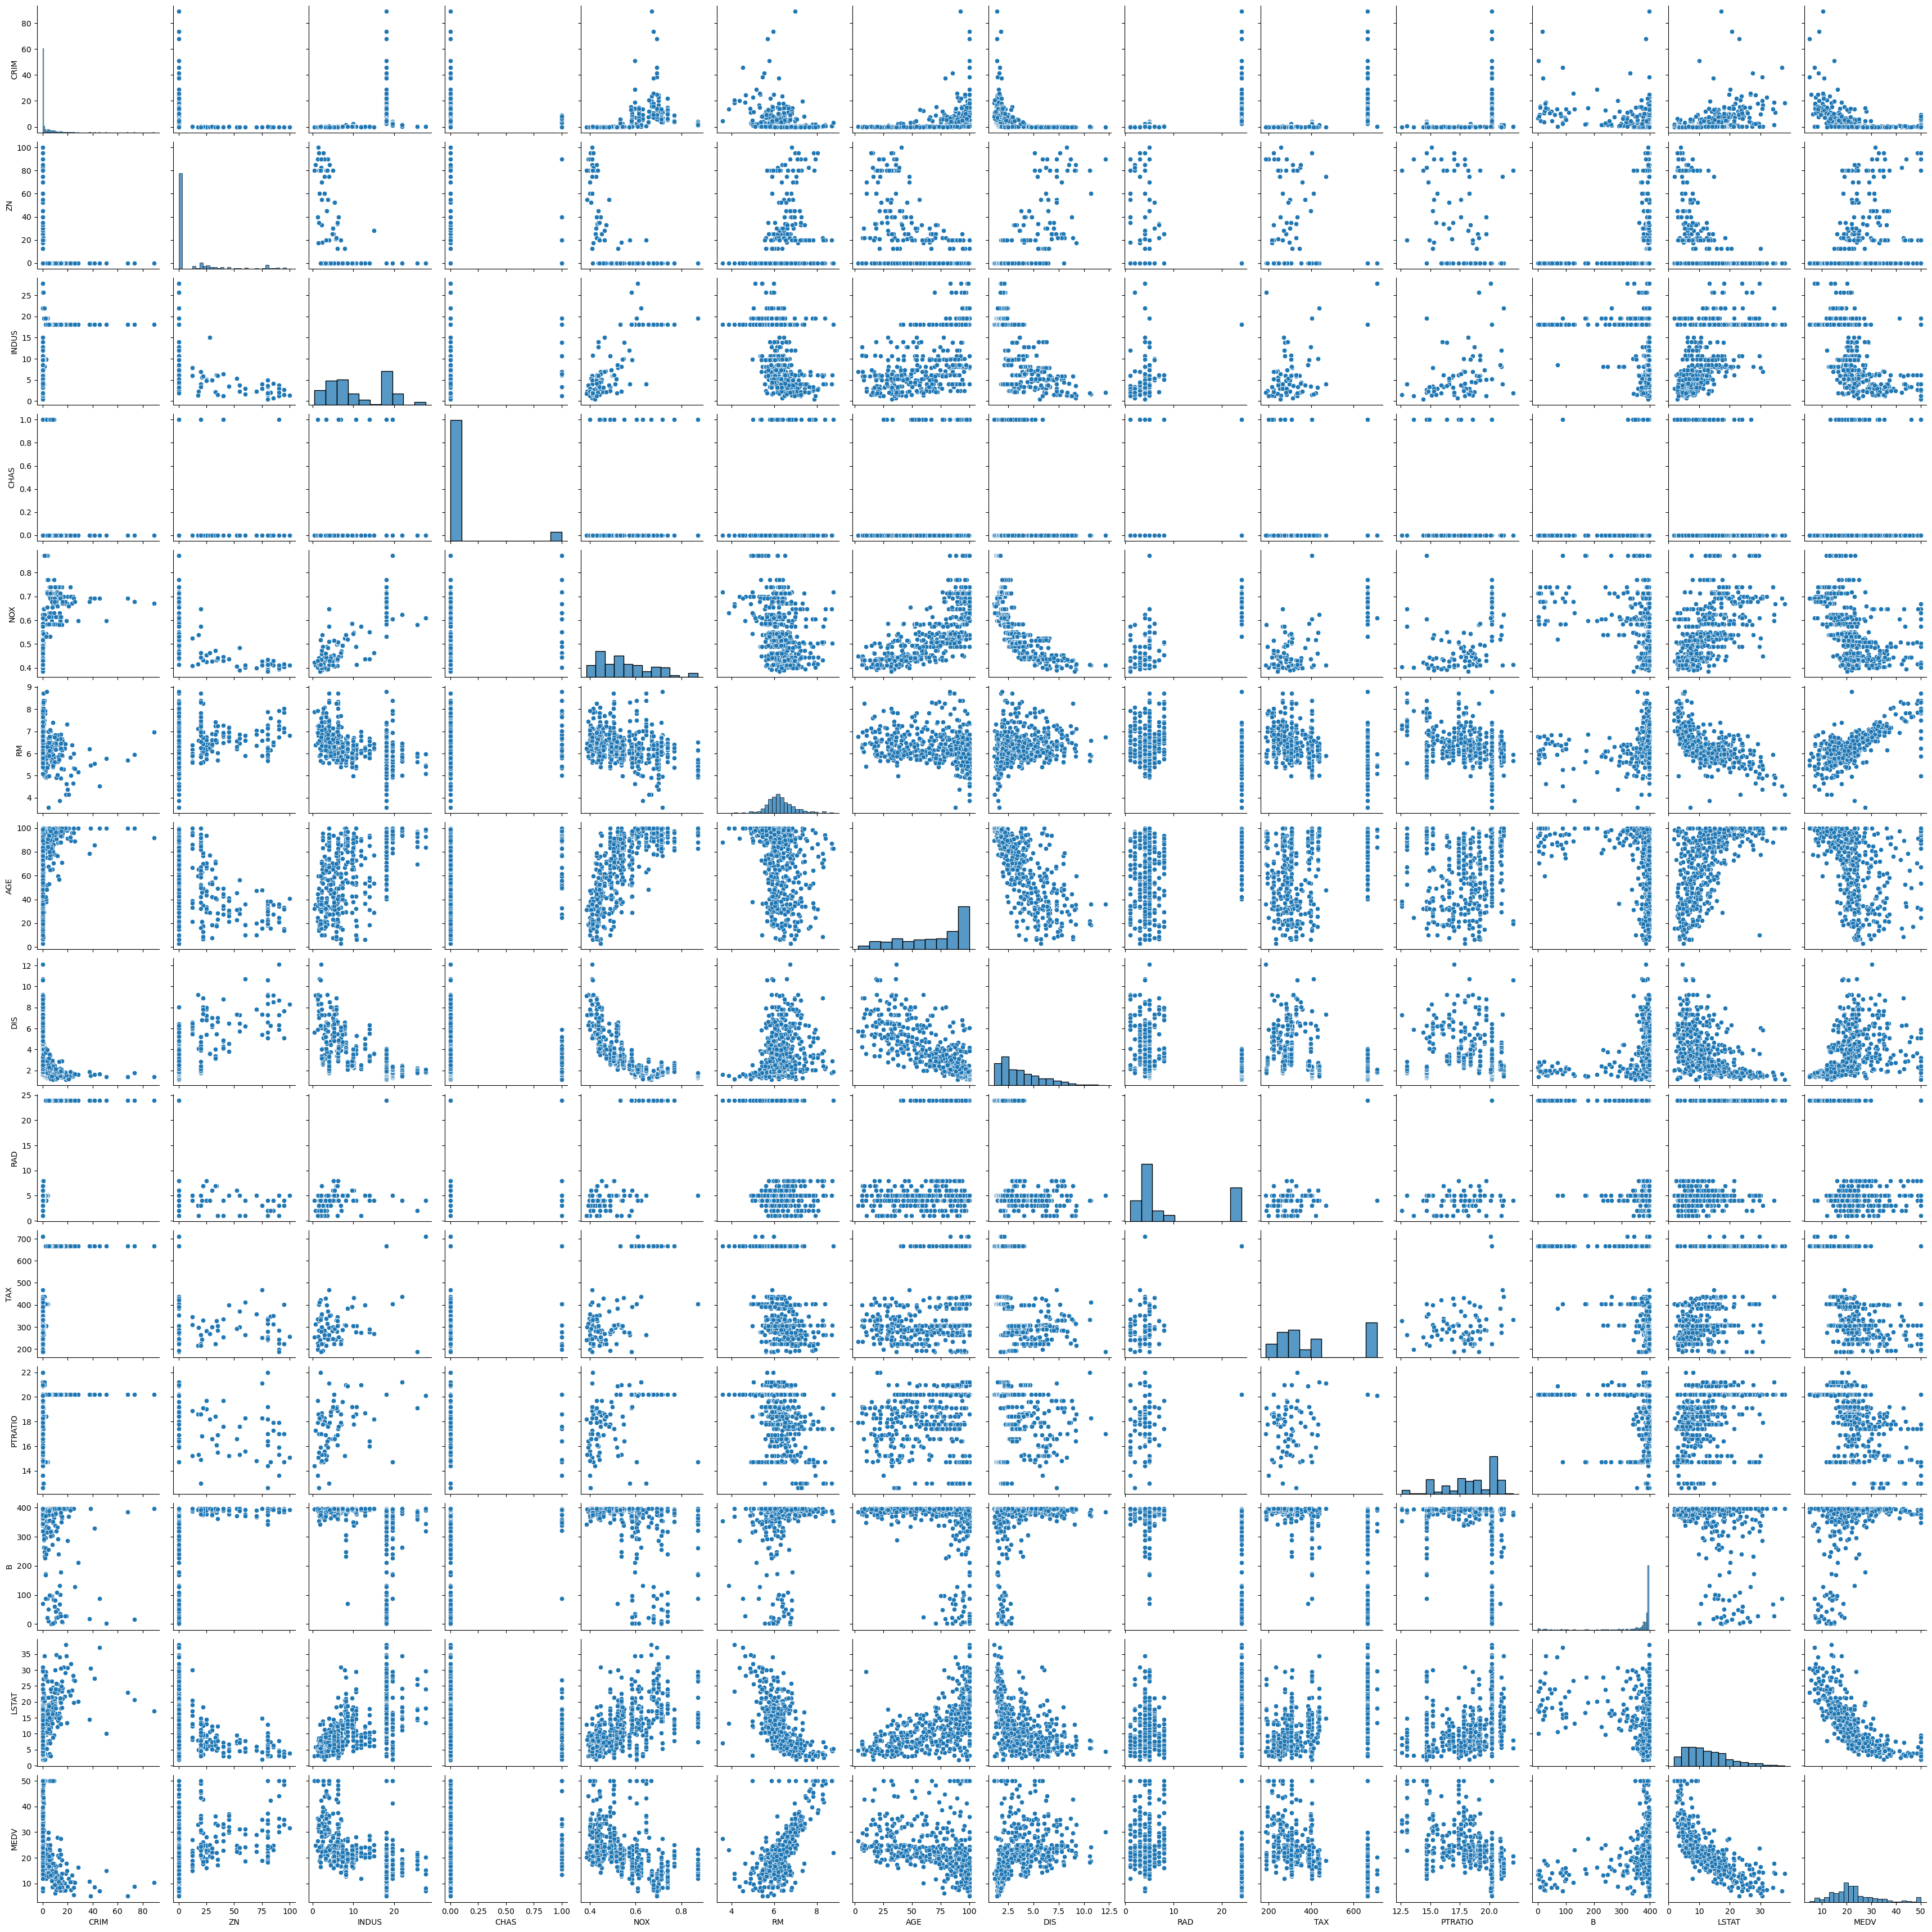

In [227]:
sns.pairplot(boston_df)
plt.show()

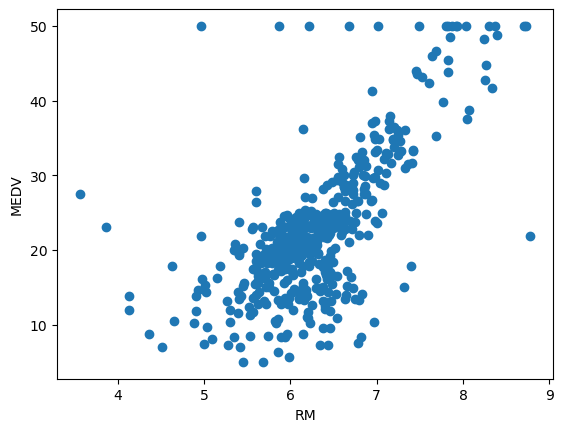

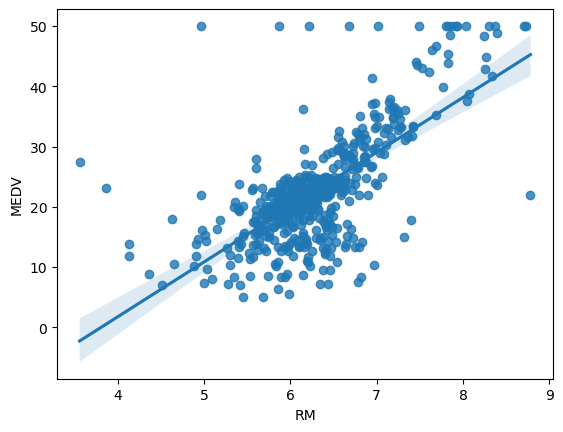

In [238]:
#ind var : RAD and dep var : crim
plt.scatter(x=boston_df['RM'],y=boston_df['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()
sns.regplot(x=boston_df['RM'],y=boston_df['MEDV'])
plt.show()

#seeing below ..as RM increases price's will increase and this positively correlated

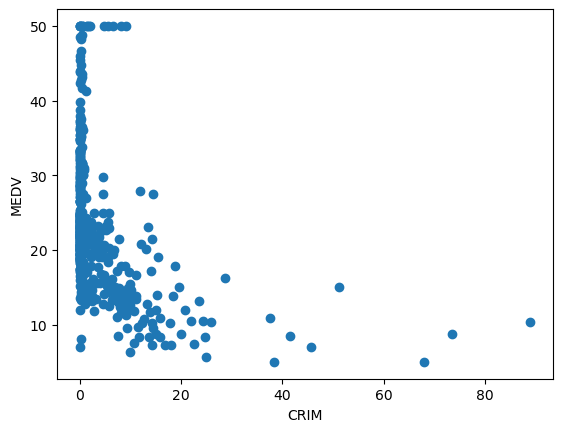

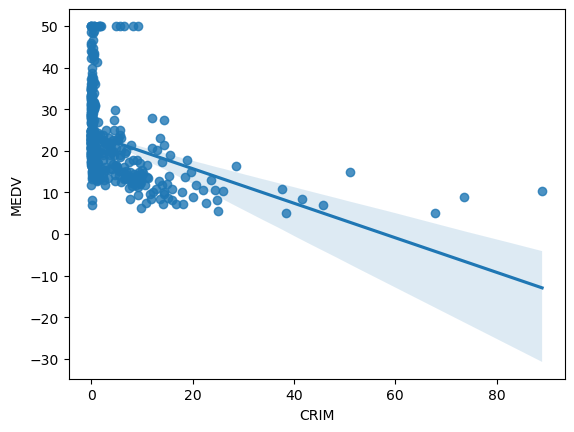

In [237]:
plt.scatter(x=boston_df['CRIM'],y=boston_df['MEDV'])
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.show()
sns.regplot(x=boston_df['CRIM'],y=boston_df['MEDV'])
plt.show()

#seeing below ..as Crime rate increases price's will decrease and this negatively correlated

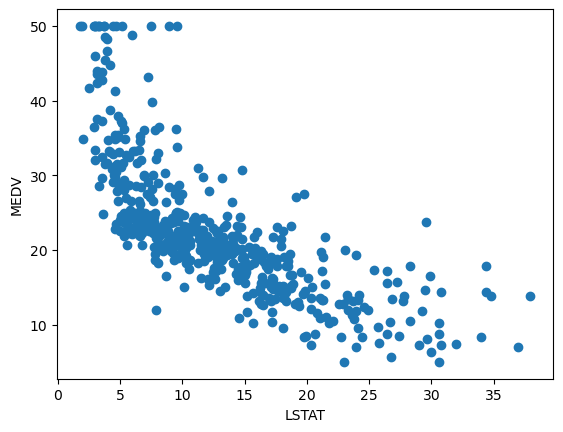

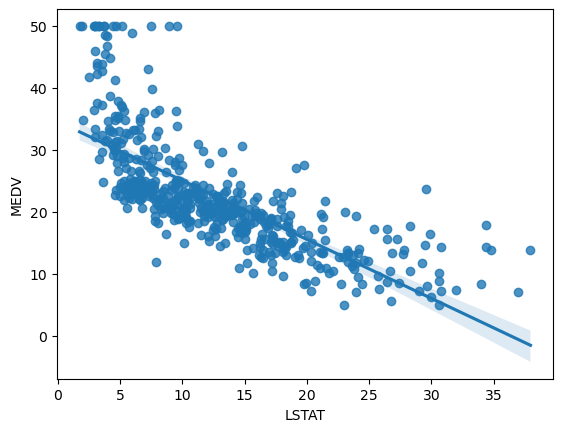

In [240]:
plt.scatter(x=boston_df['LSTAT'],y=boston_df['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()
sns.regplot(x=boston_df['LSTAT'],y=boston_df['MEDV'])
plt.show()

##as lower status population is not there then prices are high, and if lower status population is there prices are low

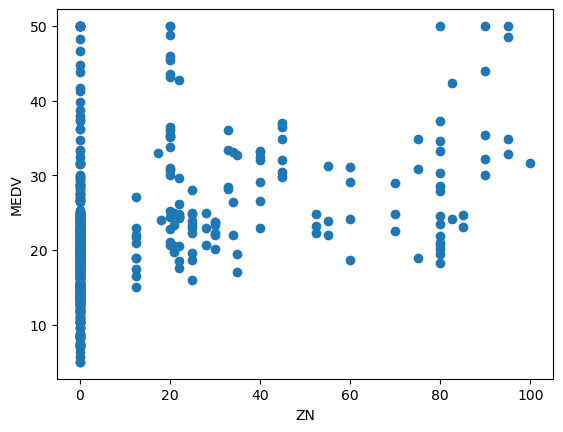

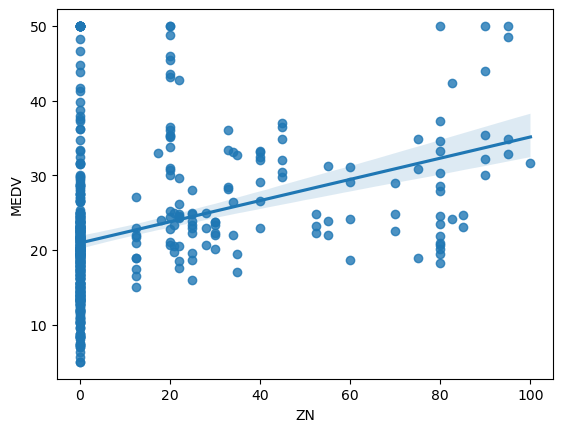

In [241]:
plt.scatter(x=boston_df['ZN'],y=boston_df['MEDV'])
plt.xlabel('ZN')
plt.ylabel('MEDV')
plt.show()
sns.regplot(x=boston_df['ZN'],y=boston_df['MEDV'])
plt.show()


In [261]:
#independent and dependent features
y=boston_df['MEDV']
X=boston_df.iloc[:,:-1]
print(boston_df.shape)
print(X.shape)
print(y.shape)

(506, 14)
(506, 13)
(506,)


In [270]:
Xtr,Xte,ytr,yte=train_test_split(X,y,test_size=0.30,random_state=42)
print(Xtr.shape)
print(ytr.shape)
print(Xte.shape)
print(yte.shape)

(354, 13)
(354,)
(152, 13)
(152,)


In [271]:
#standardization
sc=StandardScaler()
Xtr=sc.fit_transform(Xtr)
Xte=sc.transform(Xte)

In [301]:
#Model Training
lr=LinearRegression()
lr.fit(Xtr,ytr)
ypred=lr.predict(Xte)
print("training score:",lr.score(Xtr,ytr))
print("testing score:",lr.score(Xte,yte))

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("MSE score :",mean_squared_error(yte,ypred))
print("MAE score :",mean_absolute_error(yte,ypred))
print("root mse score :",np.sqrt(mean_squared_error(yte,ypred)))
print("rsquare score :",r2_score(yte,ypred))
#1-(1-r2score)*(len(yte)-1)/(len(yte)-Xte.shape[1]-1)
adj_r2=1-(1-r2_score(yte,ypred))*(len(yte)-1)/(len(yte)-Xte.shape[1]-1)
print("adjusted r2 score:",adj_r2)

ypred1=lr.predict(Xtr)
print("train model score :",mean_squared_error(ytr,ypred1))

ypred2=lr.predict(Xte)
print("test model score :",mean_squared_error(yte,ypred2))

training score: 0.7434997532004697
testing score: 0.7112260057484932
MSE score : 21.51744423117722
MAE score : 3.1627098714574053
root mse score : 4.638689926172821
rsquare score : 0.7112260057484932
adjusted r2 score: 0.6840226584639308
train model score : 22.545481487421426
test model score : 21.51744423117722


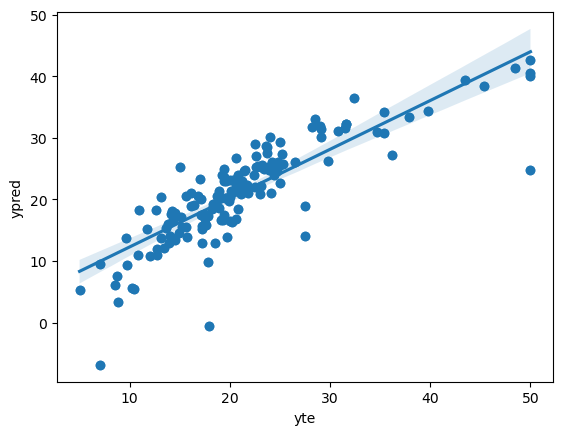

In [289]:
#plot to check the relation between yte and ypred
plt.scatter(x=yte,y=ypred)
sns.regplot(x=yte,y=ypred)
plt.xlabel('yte')
plt.ylabel('ypred')
plt.show()

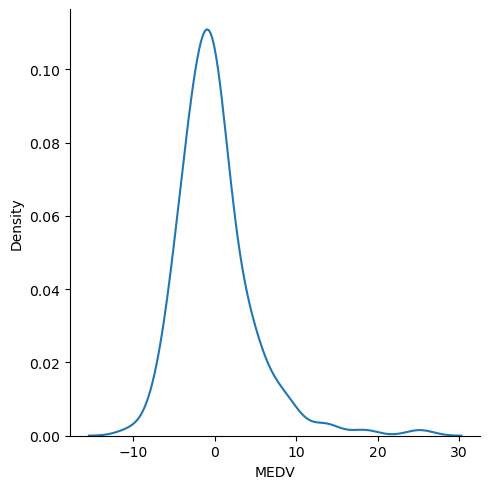

In [293]:
#residual plot ..except few outliers it is almost normally distributed
resid=yte-ypred
sns.displot(resid,kind='kde')
plt.show()

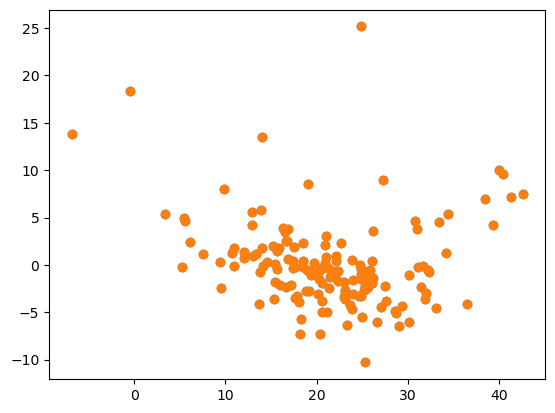

In [295]:
#scatter plot between predicted values and residuals...it should be scatterd and uniformly distributed and it should not follow any pattern

plt.scatter(ypred,resid)
plt.show()

In [323]:
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [310]:
# checking the model for the new data.. here consider the data from the same dataset

new_data=boston_df.iloc[0,:-1]
print(new_data.shape)
new_data.values.reshape(1,-1).shape


(13,)


(1, 13)

In [312]:
sc.transform(new_data.values.reshape(1,-1))

array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [313]:
#predicted value
lr.predict(sc.transform(new_data.values.reshape(1,-1)))

array([30.08649576])

In [322]:
#actual value is
boston_df.iloc[0,-1]

24.0

In [327]:
#pickle the model file for deployement

import pickle

In [328]:
pickle.dump(lr,open('regmodel.pkl','wb'))

In [329]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [330]:
pickled_model.predict(sc.transform(new_data.values.reshape(1,-1)))

array([30.08649576])